## This is Lab that work with London prices
**I want to lern how to use makrdown**<br>
*italic text*
- One
- Two
   - Three
   - Four
```python
print("Hello")
> This is a blockquote

In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.metrics import mean_squared_error

In [43]:
# Construct the file path to the parent directory
file_path = os.path.join('kaggle_london_house_price_data.csv')

# Load the data
df = pd.read_csv(file_path)

# Drop rows with missing values
df = df.dropna(subset=["floorAreaSqM", "saleEstimate_currentPrice"])

In [44]:
# Print number of rows
print("Number of rows: ", len(df))
# Print average estimated price
print("Average estimated price: ", df["saleEstimate_currentPrice"].mean())

Number of rows:  266633
Average estimated price:  879453.9873158986


In [45]:
# Filter out rows where the postcode has fewer than 2 occurrences
postcode_counts = df["postcode"].value_counts()
valid_postcodes = postcode_counts[postcode_counts >= 2].index
filtered_df = df[df["postcode"].isin(valid_postcodes)]

# Split the data into training, cross-validation and test sets
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(filtered_df, filtered_df["postcode"]):
    strat_train_set_n = filtered_df.iloc[train_index]
    strat_test_set_n = filtered_df.iloc[test_index]

strat_splits.append([strat_train_set_n, strat_test_set_n])

/opt/conda/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [46]:
# Function for shuffle and split data
def shuffle_and_split_data(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [47]:
# Split data on train and test with determinated random
train_set, test_set = shuffle_and_split_data(df, 0.2)
print("Number of rows in training set: ", len(train_set))

Number of rows in training set:  213307


In [48]:
# Plot diviation prices
dl = [0] * 22
for y in train_set[["saleEstimate_currentPrice"]].values:
    # count values less then 150000
    if y < 60000:
        dl[0] = dl[0] + 1
    elif y >= 60000 and y < 100000:
        dl[1] = dl[1] + 1
    elif y >= 100000 and y < 140000:
        dl[2] = dl[2] + 1
    elif y >= 140000 and y < 180000:
        dl[3] = dl[3] + 1
    elif y >= 180000 and y < 220000:
        dl[4] = dl[4] + 1
    elif y >= 220000 and y < 260000:
        dl[5] = dl[5] + 1
    elif y >= 260000 and y < 300000:
        dl[6] = dl[6] + 1
    elif y >= 300000 and y < 340000:
        dl[7] = dl[7] + 1
    elif y >= 340000 and y < 380000:
        dl[8] = dl[8] + 1
    elif y >= 380000 and y < 420000:
        dl[9] = dl[9] + 1
    elif y >= 420000 and y < 460000:
        dl[10] = dl[10] + 1
    elif y >= 460000 and y < 500000:
        dl[11] = dl[11] + 1
    elif y >= 500000 and y < 540000:
        dl[12] = dl[12] + 1
    elif y >= 540000 and y < 580000:
        dl[13] = dl[13] + 1
    elif y >= 580000 and y < 620000:
        dl[14] = dl[14] + 1
    elif y >= 620000 and y < 660000:
        dl[15] = dl[15] + 1
    elif y >= 660000 and y < 700000:
        dl[16] = dl[16] + 1
    elif y >= 700000 and y < 740000:
        dl[17] = dl[17] + 1
    elif y >= 740000 and y < 780000:
        dl[18] = dl[18] + 1
    elif y >= 780000 and y < 820000:
        dl[19] = dl[19] + 1
    elif y >= 820000 and y < 860000:
        dl[20] = dl[20] + 1
    elif y >= 860000 and y < 900000:
        dl[21] = dl[21] + 1
  
print(dl)

[0, 2, 51, 377, 1241, 2973, 6253, 9049, 11056, 13676, 14474, 14220, 12645, 11394, 9877, 9074, 7981, 6783, 6321, 5711, 5489, 4478]


0.0
0.0007500946994558063
0.01912741483612306
0.14139285084741948
0.4654337610123278
1.115015770741056
2.3451710778485784
3.3938034676877957
4.146523498591697
5.129147554878803
5.42843533996167
5.333173313130782
4.742473737309336
4.273289502799728
3.704342673262499
3.4031796514309933
2.993252898178395
2.5439461732043673
2.370674297630076
2.141895414296055
2.0586349026564603
1.6794620320815503


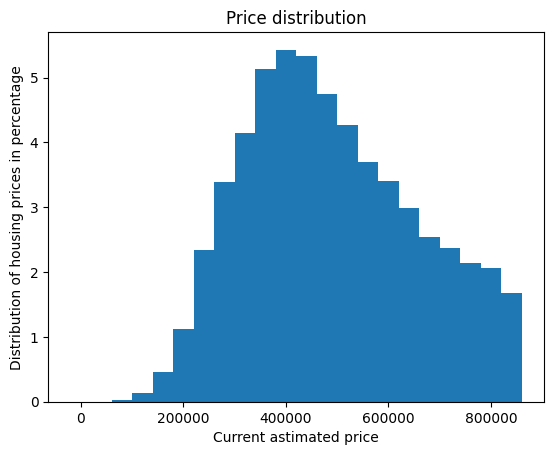

In [49]:
# Plot histogram set
dlcc = dl
for i in range(0, 22):
    dlcc[i] = ( dlcc[i] / len(df) ) * 100
    print(dlcc[i])
plt.bar(range(0, 880000, 40000), dlcc, width=40000)
plt.xlabel("Current astimated price")
plt.ylabel("Distribution of housing prices in percentage")
plt.title("Price distribution")
plt.show()


In [50]:
# Ptint minimal and maximal current price
print(train_set["saleEstimate_currentPrice"].min())
print(train_set["saleEstimate_currentPrice"].max())



89000.0
25681000.0


In [51]:
# Add a column for the log of the sale estimate
X = train_set[["floorAreaSqM"]].values
y = train_set[["saleEstimate_currentPrice"]].values

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

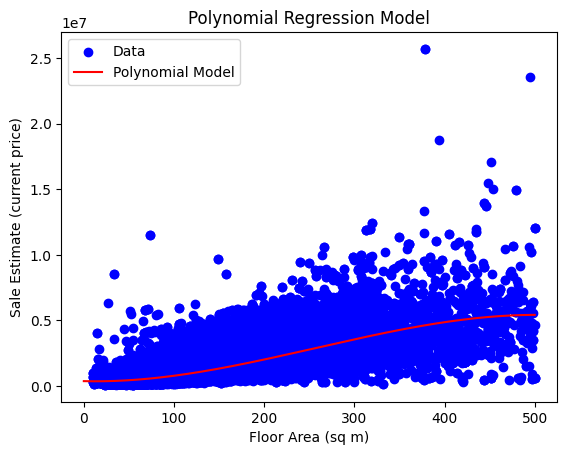

In [52]:
# Add a column for the log of the sale estimate train
X_ = train[["floorAreaSqM"]].values
y_ = train[["saleEstimate_currentPrice"]].values
# Create a polynomial regression model
model_ = np.poly1d(np.polyfit(X_.flatten(), y_.flatten(), 3))

# Make predictions polynomial model
X_new = np.linspace(0, 500, 500)
y_pred = model_(X_new)
# Plot the data and the model
plt.scatter(X_, y_, color='blue', label='Data')
plt.plot(X_new, y_pred, color='red', label='Polynomial Model')
plt.xlabel('Floor Area (sq m)')
plt.ylabel('Sale Estimate (current price)')
plt.title('Polynomial Regression Model')
plt.legend()
plt.show()

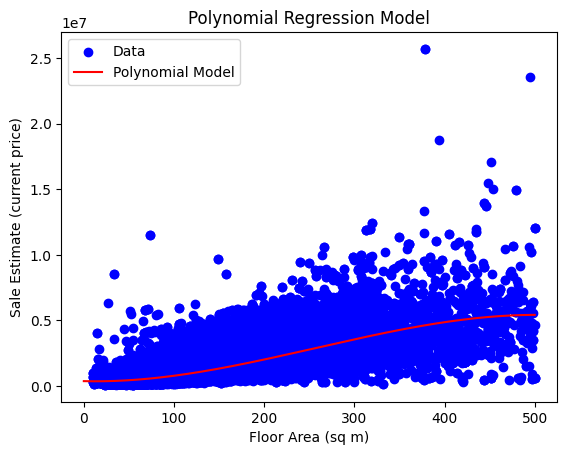

In [53]:
# Create a polynomial regression model using Sklearn
poly_4 = PolynomialFeatures(degree=3)

# Transform our numpy array X_ into a 2D array
X_poly_4 = poly_4.fit_transform(X_)

# Fit the polynomial regression model
poly_reg_model_4 = LinearRegression()
poly_reg_model_4.fit(X_poly_4, y_)

# Make predictions using the polynomial regression model
X_new_4 = np.linspace(0, 500, 500).reshape(-1, 1)
X_new_poly_4 = poly_4.transform(X_new_4)
y_pred_4 = poly_reg_model_4.predict(X_new_poly_4)

# Plot the data and the polynomial regression model
plt.scatter(X_, y_, color='blue', label='Data')
plt.plot(X_new_4, y_pred_4, color='red', label='Polynomial Model')
plt.xlabel('Floor Area (sq m)')
plt.ylabel('Sale Estimate (current price)')
plt.title('Polynomial Regression Model')
plt.legend()
plt.show()

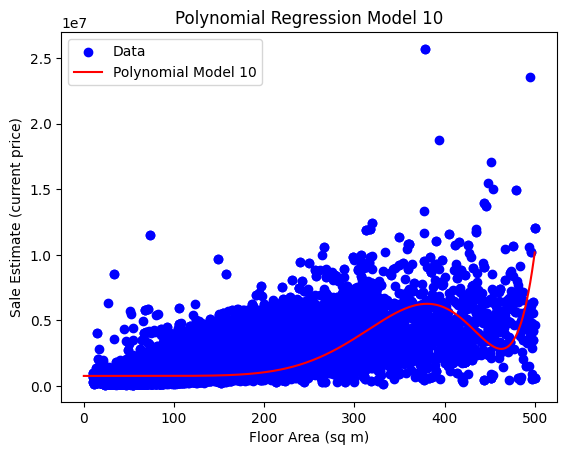

In [55]:
# Create a polynomial regression model using Sklearn
poly_10 = PolynomialFeatures(degree=10)

# Transform our numpy array X_ into a 2D array
X_poly_10 = poly_10.fit_transform(X_)

# Fit the polynomial regression model 10
poly_reg_model_10 = LinearRegression()
poly_reg_model_10.fit(X_poly, y_)

# Make predictions using the polynomial regression model
X_new_10 = np.linspace(0, 500, 500).reshape(-1, 1)
X_new_poly_10 = poly_10.transform(X_new_10)
y_pred_10 = poly_reg_model_10.predict(X_new_poly_10)

# Plot the data and the polynomial regression model 10
plt.scatter(X_, y_, color='blue', label='Data')
plt.plot(X_new_10, y_pred_10, color='red', label='Polynomial Model 10')
plt.xlabel('Floor Area (sq m)')
plt.ylabel('Sale Estimate (current price)')
plt.title('Polynomial Regression Model 10')
plt.legend()
plt.show()

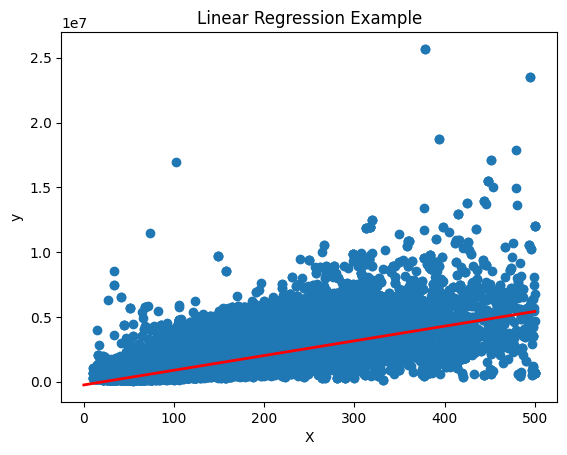

In [56]:
# Make predictions
X_new = np.array([[0], [500]])
y_predict = model.predict(X_new)

# Plot the results
plt.scatter(X, y)
plt.plot(X_new, y_predict, color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.show()

In [57]:
# Print the coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

Intercept: [-249152.22542331]
Slope: [[11336.80312254]]


In [61]:
# Оценить модель на кросс валидационном наборе, используя среднеквадратичную ошибку (MSE) деленную на количество строк в начальном наборе данных
from sklearn.metrics import mean_squared_error
X_validate = validate[["floorAreaSqM"]].values
y_validate = validate[["saleEstimate_currentPrice"]].values
y_pred_validate = model.predict(X_validate)
mse = mean_squared_error(y_validate, y_pred_validate)
print("Mean Squared Error:", mse)
# Оценить модель на кросс валидационном наборе наборе, используя среднеквадратичную ошибку (MSE) деленную на количество строк в начальном наборе данных poly_reg_model_4
X_validate_poly_4 = poly_4.transform(X_validate)
y_pred_validate_poly_4 = poly_reg_model_4.predict(X_validate_poly_4)
mse_poly_4 = mean_squared_error(y_validate, y_pred_validate_poly_4)
print("Mean Squared Error (Polynomial Model):", mse_poly_4)
# Оценить модель на кросс валидационном наборе наборе, используя среднеквадратичную ошибку (MSE) деленную на количество строк в начальном наборе данных poly_reg_model_10
X_validate_poly_10 = poly_10.transform(X_validate)
y_pred_validate_poly_10 = poly_reg_model_10.predict(X_validate_poly_10)
mse_poly_10 = mean_squared_error(y_validate, y_pred_validate_poly_10)
print("Mean Squared Error (Polynomial Model 10):", mse_poly_10)

Mean Squared Error: 326035037111.9808
Mean Squared Error (Polynomial Model): 309779166065.73944
Mean Squared Error (Polynomial Model 10): 452559870921.6971


In [62]:
# Оценить модель на тестовом наборе наборе, используя среднеквадратичную ошибку (MSE) деленную на количество строк в начальном наборе данных poly_reg_model_4
X_test_poly_4 = poly_4.transform(test_set[["floorAreaSqM"]].values)
y_test_poly_4 = poly_reg_model_4.predict(X_test_poly_4)
mse_test_poly_4 = mean_squared_error(test_set[["saleEstimate_currentPrice"]].values, y_test_poly_4)
print("Mean Squared Error (Test Set Polynomial Model):", mse_test_poly_4)
# Оценить модель на тестовом наборе наборе, используя среднеквадратичную ошибку (MSE) деленную на количество строк в начальном наборе данных model линейной регрессии
X_test = test_set[["floorAreaSqM"]].values
y_test = model.predict(X_test)
mse_test = mean_squared_error(test_set[["saleEstimate_currentPrice"]].values, y_test)
print("Mean Squared Error (Test Set Linear Model):", mse_test)

Mean Squared Error (Test Set Polynomial Model): 308647020387.46124
Mean Squared Error (Test Set Linear Model): 324670064481.6541
